In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Neuron Models

## Izhikevich Neuron Model

```
[1] E. M. Izhikevich, "Simple model of spiking neurons."
IEEE Transactions on Neural Networks, vol. 14, no. 6, pp. 1569-1572.
(http://www.izhikevich.org/publications/spikes.pdf)
(https://www.izhikevich.org/publications/spikes.htm)
```

Let's first model a Izhikevich Simple Neuron Model. Details are in his paper and website.

In Izhikevich's simple neuron model, the change in time occurs in two variables, $v$ and $u$ which represent the neuron's membrane voltage and membrane recovery.
The change in each is computed as:

$$
\begin{align}
\frac{dv}{dt} &= 0.04 v^2 + 5 v + 140 - u + I \\
\frac{du}{dt} &= a ( b v - u )
\end{align}
\\
\text{if } v > 30 \text{mV then }
\begin{cases}
v \leftarrow c \\
u \leftarrow u + d
\end{cases}
$$

![izhikevich](graphics/izhik.gif)

In [2]:
dt = 0.001 # set 1 ms timestep

a = 0.02  # tau_recovery: time scale of the recovery variable
b = 0.25  # coupling: How sensitive recovery is to subthreshold fluctucations of voltage
c = -65   # reset voltage (mV): The voltage to reset to after a spike
d = 2     # reset_recovery: The recovery value to reset to after a spike

input_current = range(28) # constant inputs for each simulation

In [3]:
t = np.arange(0, 1, 0.001)

In [4]:
# voltage represents membrane potential of a neuron
# u represents the membrane recovery

vt = [0]
ut = [0]
fire = [0]*len(input_current)

for idx, I in enumerate(input_current):
    for _ in t:
        voltage = vt[-1]
        recovery = ut[-1]
        
        # compute change in voltage and recovery
        dv = (0.04 * voltage**2 + 5 * voltage + 140 - recovery + I) * 1000
        du = a*(b * voltage - recovery) * 1000
        
        # apply change
        voltage += dv * dt
        recovery += du * dt
        
        # if voltage threshold reached (spiked), reset
        if voltage > 30: # mV
            fire[idx] += 1
            voltage = c
            recovery = recovery + d

        # save voltage and recovery for plotting
        vt.append(voltage)
        ut.append(recovery)

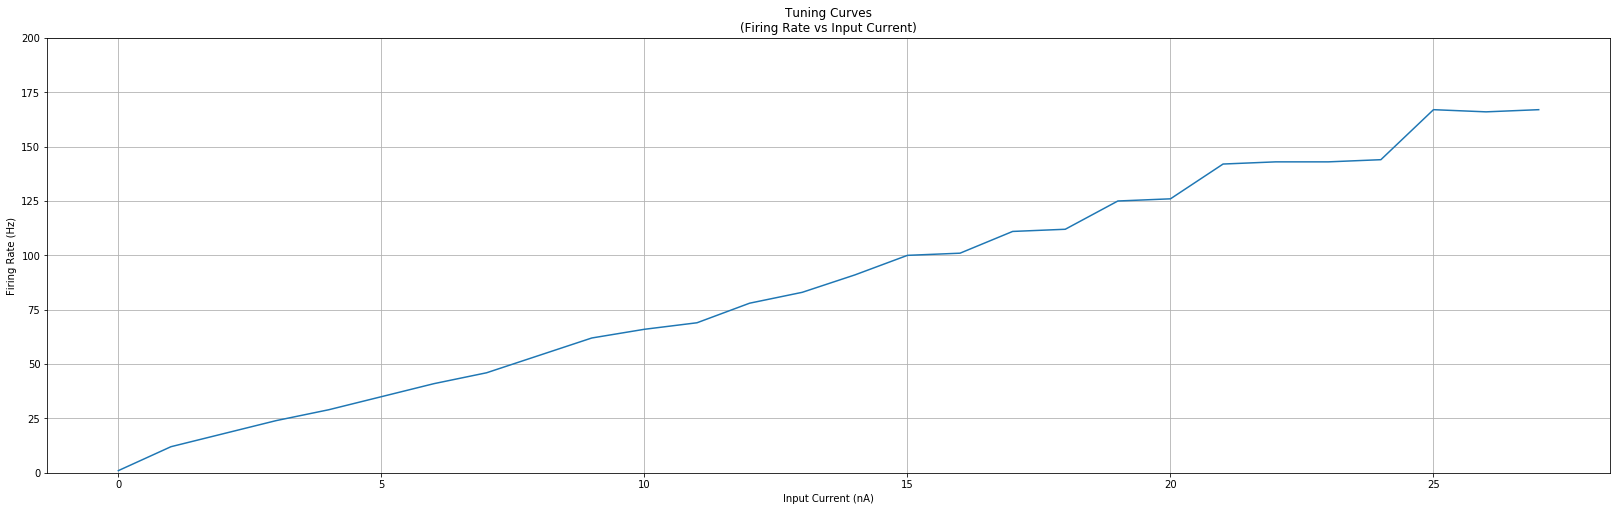

In [5]:
plt.figure(figsize=(28,8))
plt.plot(input_current, fire)
plt.ylim(0, 200)
plt.ylabel('Firing Rate (Hz)')
plt.xlabel('Input Current (nA)')
plt.title('Tuning Curves\n(Firing Rate vs Input Current)')
plt.grid()

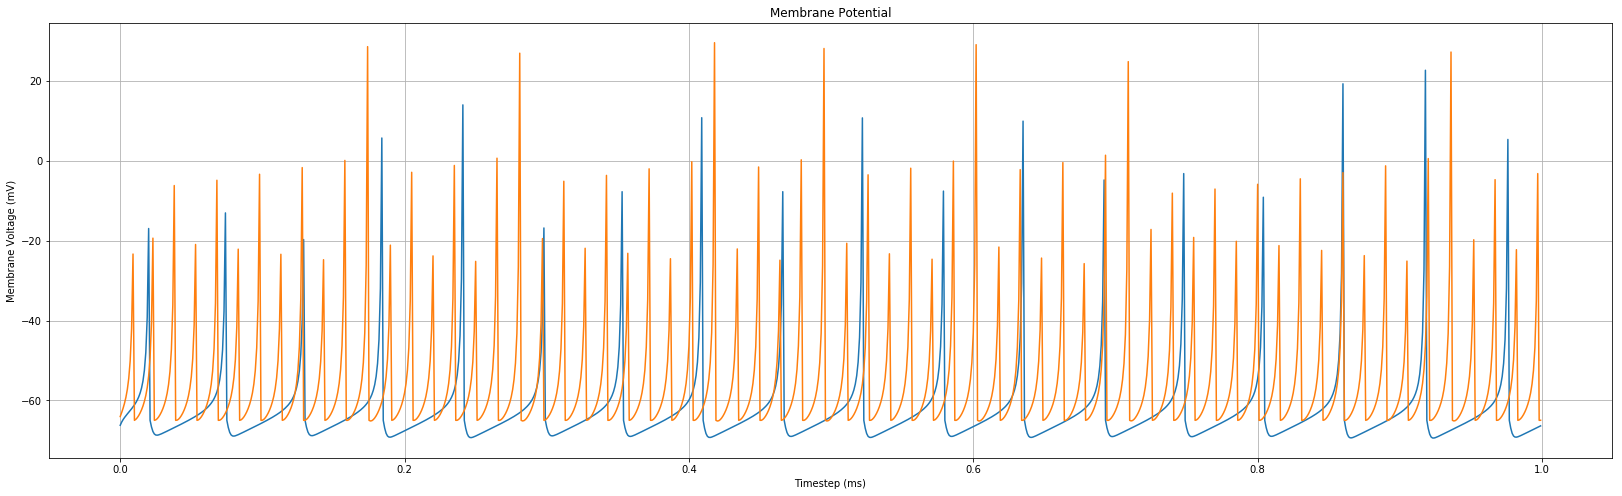

In [6]:
plt.figure(figsize=(28,8))
plt.plot(t, vt[2001:3001])
plt.plot(t, vt[10001:11001])
plt.ylabel('Membrane Voltage (mV)')
plt.xlabel('Timestep (ms)')
plt.title('Membrane Potential')
plt.grid()

## Integrate and Fire Neurons

Integrate and Fire Neurons modeled from here: https://neuronaldynamics.epfl.ch/online/Ch1.S3.html

```
In the following we introduce the simplest model in the class of integrate-and-fire models using the following two ingredients: (i) a linear differential equation to describe the evolution of the membrane potential; (ii) a threshold for spike firing. This model is called the ‘Leaky Integrate-and-Fire’ Model.
```

The neurons are modeled after the book. When the voltage threshold is met, the voltage spikes modeled after the Dirac Delta function and a refractory time is incurred by the neuron of which its voltage remains at $v_{rest}$ and no spikes occur. (Dirac Delta function is substituted in this setup) BUT!!! Added a $v_{spike}$ for special effect ;) (granted it has a width of `dt`)

$$
\tau_m \dfrac{dv}{dt} = -[v(t) -v_{rest}] + RI(t)
$$

In [7]:
v_threshold = -50
R = 2.6
tau_m = 10
tau_ref = 2.7
v_rest = -70

input_current = range(28)

v_spike = 30

In [8]:
t = np.arange(0, 1, 0.001)

In [9]:
# voltage represents membrane potential of a neuron
# u represents the membrane recovery

vt = [v_rest]
fire = [0]*len(input_current)
ref_t = 0
for idx, I in enumerate(input_current):
    for _ in t:
        voltage = vt[-1]

        dv_dt = (-(voltage - v_rest) + R * I) / tau_m

        if ref_t <= 0:
            # apply change
            voltage += dv_dt# * dt
            ref_t = 0
        else:
            voltage = v_rest
            ref_t -= dt

        # if voltage threshold reached (spiked), reset
        if voltage > v_threshold: # mV
            fire[idx] += 1
            #voltage = v_rest
            voltage = v_spike
            ref_t = tau_ref / 1000 # convert ms to sec

        # save voltage and recovery for plotting
        vt.append(voltage)

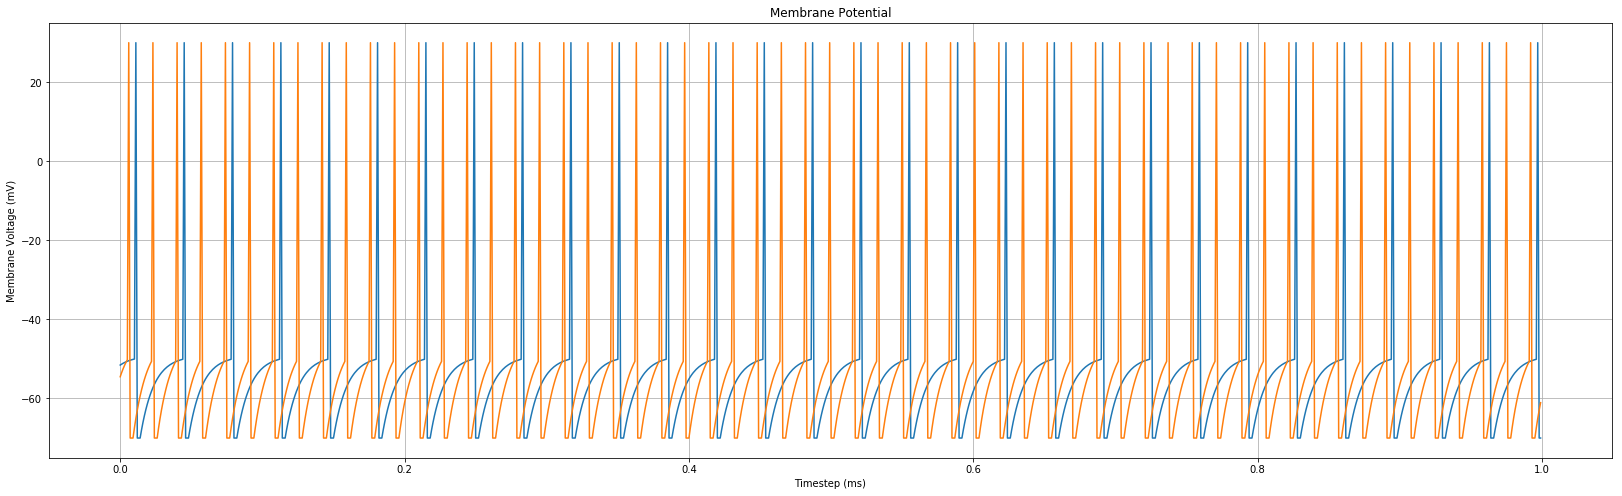

In [10]:
plt.figure(figsize=(28,8))

plt.plot(t, vt[8001:9001])
plt.plot(t, vt[10001:11001])
plt.ylabel('Membrane Voltage (mV)')
plt.xlabel('Timestep (ms)')
plt.title('Membrane Potential')
plt.grid()

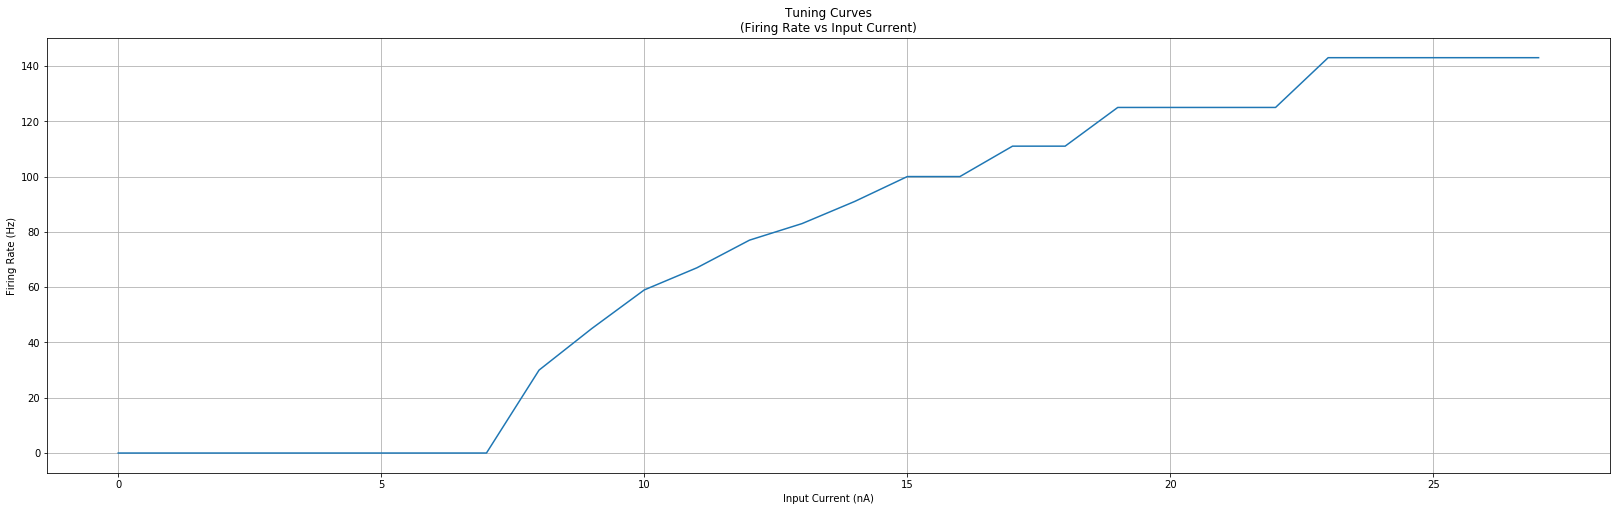

In [11]:
plt.figure(figsize=(28,8))
plt.plot(input_current, fire)
plt.ylabel('Firing Rate (Hz)')
plt.xlabel('Input Current (nA)')
plt.title('Tuning Curves\n(Firing Rate vs Input Current)')
plt.grid()